In [1]:
from models.CNN import CNN, plot_training
from torch.utils.data import DataLoader
from utils.customDataset import CustomDataset
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
X_filenames = df_data.iloc[:,0].values
species = df_data['species'].unique()

# Creation of the targets vector
t = np.zeros((len(X_filenames),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1

In [4]:
X_train_filenames, X_test_filenames, t_train, t_test = train_test_split(X_filenames, t, test_size=0.3, random_state=0)

In [5]:
img_size = 32

batch_size = 1

dataset_train = CustomDataset('../data/images', filenames=X_train_filenames, targets=t_train, classes=species, img_size=img_size)
dataset_test = CustomDataset('../data/images', filenames=X_test_filenames, targets=t_test, classes=species, img_size=img_size)
train_dataloader = DataLoader(dataset_train, batch_size=batch_size)
test_dataloader = DataLoader(dataset_train, batch_size=batch_size)

In [6]:
model = CNN(num_epochs=100)

In [7]:
model.set_model(num_channels=1, output_size=species.size)

In [8]:
model.set_optimizer(optim='SGD', lr=1e-3, reg=0)

In [9]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(train_dataloader, test_dataloader)

Epoch 1/100, Loss: 4.59582, Accuracy: 3.32%
Epoch 2/100, Loss: 4.05461, Accuracy: 8.51%
Epoch 3/100, Loss: 3.40321, Accuracy: 18.18%
Epoch 4/100, Loss: 2.83405, Accuracy: 28.14%
Epoch 5/100, Loss: 2.35195, Accuracy: 35.79%
Epoch 6/100, Loss: 2.03023, Accuracy: 42.71%
Epoch 7/100, Loss: 1.79130, Accuracy: 50.65%
Epoch 8/100, Loss: 1.62278, Accuracy: 50.36%
Epoch 9/100, Loss: 1.32693, Accuracy: 60.61%
Epoch 10/100, Loss: 1.17341, Accuracy: 64.36%
Epoch 11/100, Loss: 1.07609, Accuracy: 67.24%
Epoch 12/100, Loss: 1.01868, Accuracy: 68.54%
Epoch 13/100, Loss: 0.85630, Accuracy: 74.46%
Epoch 14/100, Loss: 0.76219, Accuracy: 74.75%
Epoch 15/100, Loss: 0.66242, Accuracy: 78.64%
Epoch 16/100, Loss: 0.63913, Accuracy: 80.81%
Epoch 17/100, Loss: 0.57501, Accuracy: 83.26%
Epoch 18/100, Loss: 0.49500, Accuracy: 83.98%
Epoch 19/100, Loss: 0.49536, Accuracy: 85.14%
Epoch 20/100, Loss: 0.46179, Accuracy: 85.43%
Epoch 21/100, Loss: 0.44917, Accuracy: 86.44%
Epoch 22/100, Loss: 0.32478, Accuracy: 90.04%

In [10]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 100.00% on test data


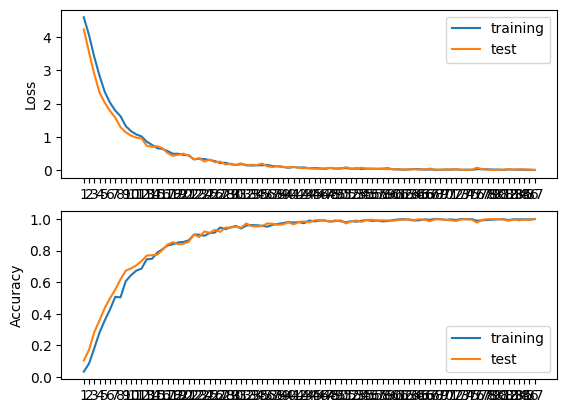

In [11]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test)